In [1]:
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import seaborn as sns
import geopandas as gpd
import earthpy as et
import xarray as xr
from mpl_toolkits.basemap import Basemap, cm, shiftgrid, addcyclic
from datetime import datetime
# Spatial subsetting of netcdf files
import regionmask
import glob
import rioxarray
from shapely.geometry import mapping
import pickle
import copy

import pytesmo.timedate.dekad as dekad
import pytesmo.timedate

ERROR 1: PROJ: proj_create_from_database: Open of /home/tiro/miniconda3/envs/my_env/share/proj failed


In [2]:
cities = pd.read_csv('../data/Southern_Africa_cities.csv')

station_coords = cities.get(['Country','City', 'lat', 'lon']).reset_index()
station_coords.columns = ['index', 'country', 'station', 'lat', 'lon']

In [5]:
#### RAN

cities_1 = np.unique(station_coords.station)
#cities_1 = ['Victoria']
fig=plt.figure(figsize=(15,12))
j=0
countries = cities_1
countries = ['Gaborone'] #cities_1

year1 = datetime(1991, 1, 1)
year2 = datetime(2020, 12, 31)
yr = '2016-07-01'
yr_2 = '2017-06-30'

for country in countries:
    
    pickles = glob.glob('../data/pickles_py/point/cities/day/*_day_*ARC*'+country+'.pickle')
    #print('')
    #print(country)
    pickles = sorted(pickles)
    reanalysis = {}
    for pickle_1 in pickles:
 
        reanalysis_keys = []
        
        with open(pickle_1, 'rb') as handle:
            b = pickle.load(handle)
        dataset = list(b.keys())[0]
        data = b[dataset]

        file_split=pickle_1.split("/")
        filename=file_split[-1]
        filename_split=filename.split("_")
        filename_base=filename.split(".")[0]
        institute=filename_split[2]  
        dataset=filename_split[3]
        #print(dataset)
        key_name = dataset
        reanalysis_keys.append(key_name)
        doy_stations = pd.DataFrame()
        for year, df in data.reset_index().groupby(data.reset_index()["time"].dt.year):
            
            
            yr = str(str(year)+'-07-01')
            yr_2 = str(str(year+1)+'-06-30')
            df = data.loc[yr:yr_2].reset_index()
                
            if country == 'Cape Town':
                yr = str(str(year)+'-02-01')
                yr_2 = str(str(year+1)+'-12-31')
                df = data.loc[yr:yr_2].reset_index()
            
            ## 3 days accumulated rainfall greater than 20mm
            m2 = df[country].shift(1).rolling(3).sum().shift(-4) >= 20
            m2_1 = df[country].shift(1).rolling(3).sum().shift(-4)
            ## No dry-spell over the next 7 days
            m3 = df[country].shift(3).rolling(10).sum().shift(-9) - df[country].rolling(3).sum().shift(-2) > 0
            m3_1 = df[country].shift(3).rolling(10).sum().shift(-9) - df[country].rolling(3).sum().shift(-2)
            
            day = df.loc[m2 & m3, 'time'].iloc[0].strftime('%Y-%m-%d') if not df[ m2 & m3].empty else str(str(year+1)+'-06-30')
            
            
    
            results = pd.DataFrame([year, day]).T
            results.columns = ['year', 'onset_date']
            #if year == 2000:
                
                #df_2 = pd.concat([df,m2_1, m2, m3_1, m3],axis=1)
                #df_2.to_csv('test_2001.csv')
                #print(results)
            doy_stations = pd.concat([doy_stations, results], axis=0)
            
        reanalysis[key_name] = copy.deepcopy(doy_stations)  
    with open('data/pickles_py/point/cities/onset/onset_day_'+country+'_1.pickle', 'wb') as handle:
        pickle.dump(reanalysis, handle, protocol=pickle.HIGHEST_PROTOCOL)

   


ValueError: unsupported pickle protocol: 5

<Figure size 1500x1200 with 0 Axes>

cities_1 = np.unique(station_coords.station)
#cities_1 = ['Victoria']
fig=plt.figure(figsize=(15,12))
j=0
countries = cities_1
#countries = ['Gaborone'] #cities_1

year1 = datetime(1991, 1, 1)
year2 = datetime(2020, 12, 31)
yr = '2016-07-01'
yr_2 = '2017-06-30'

for country in countries:
    
    pickles = glob.glob('data/pickles_py/point/cities/day/*_day_*'+country+'.pickle')
    #print('')
    #print(country)
    pickles = sorted(pickles)
    reanalysis = {}
    for pickle_1 in pickles:
 
        reanalysis_keys = []
        
        with open(pickle_1, 'rb') as handle:
            b = pickle.load(handle)
        dataset = list(b.keys())[0]
        data = b[dataset]

        file_split=pickle_1.split("/")
        filename=file_split[-1]
        filename_split=filename.split("_")
        filename_base=filename.split(".")[0]
        institute=filename_split[2]  
        dataset=filename_split[3]
        #print(dataset)
        key_name = dataset
        reanalysis_keys.append(key_name)
        doy_stations = pd.DataFrame()
        for year, df in data.reset_index().groupby(data.reset_index()["time"].dt.year):
            
            
            yr = str(str(year)+'-07-01')
            yr_2 = str(str(year+1)+'-06-30')
            df = data.loc[yr:yr_2].reset_index()
                
            if country == 'Cape Town':
                yr = str(str(year)+'-02-01')
                yr_2 = str(str(year+1)+'-12-31')
                df = data.loc[yr:yr_2].reset_index()
            
            ## 3 days accumulated rainfall greater than 20mm
            m2 = df[country].rolling(3).sum() >= 20
            m2_1 = df[country].rolling(3).sum()
            ## No dry-spell over the next 7 days
            m3 = df[country].shift(3).rolling(10).sum().shift(-13) > 0
            m3_1 = df[country].shift(3).rolling(10).sum().shift(-13) - df[country].rolling(3).sum()
            
            day = df.loc[m2 & m3, 'time'].iloc[0].strftime('%Y-%m-%d') if not df[ m2 & m3].empty else str(str(year+1)+'-06-30')
            
            
    
            results = pd.DataFrame([year, day]).T
            results.columns = ['year', 'onset_date']
            
            doy_stations = pd.concat([doy_stations, results], axis=0)
            
        reanalysis[key_name] = copy.deepcopy(doy_stations)  
    with open('data/pickles_py/point/cities/onset/onset_day_'+country+'_1.pickle', 'wb') as handle:
        pickle.dump(reanalysis, handle, protocol=pickle.HIGHEST_PROTOCOL)

   


#### Define Cessation Date

cities_1 = np.unique(station_coords.station)
#cities_1 = ['Gaborone']
fig=plt.figure(figsize=(15,12))
j=0
countries = cities_1

for country in countries:
    
    pickles = glob.glob('data/pickles_py/point/cities/day/*day*'+country+'*pickle')
    print(country)
    pickles = sorted(pickles)
    reanalysis = {}
    for pickle_1 in pickles:
 
        reanalysis_keys = []
        
        with open(pickle_1, 'rb') as handle:
            b = pickle.load(handle)
        dataset = list(b.keys())[0]
        data = b[dataset]

        file_split=pickle_1.split("/")
        filename=file_split[-1]
        filename_split=filename.split("_")
        filename_base=filename.split(".")[0]
        institute=filename_split[2]  
        dataset=filename_split[3]
        print(dataset)
        key_name = dataset
        reanalysis_keys.append(key_name)
        doy_stations = pd.DataFrame()
        for year, df in data.reset_index().groupby(data.reset_index()["time"].dt.year):
            #year = 2020
            yr = str(str(year)+'-07-01')
            yr_2 = str(str(year+1)+'-06-30')
            df = data.loc[yr:yr_2].reset_index()
            
            #m1 = df['time'].dt.month >= 
            ## 3 days accumulated rainfall greater than 20mm
            m2 = df[country].shift(1).rolling(3).sum() >= 10
            ## No dry-spell over the next 10 days
            m3 = df[country].shift(3).rolling(10).sum() - df[country].rolling(3).sum() < 1

            day = df.loc[m2 & m3, 'time'].iloc[-1].strftime('%Y-%m-%d') if not df[ m2 & m3].empty else str(str(year+1)+'-06-30')
            print(f"{year}: {day}")
    
            results = pd.DataFrame([year, day]).T
            results.columns = ['year', 'cessation_date']
            doy_stations = pd.concat([doy_stations, results], 0)
            
        reanalysis[key_name] = copy.deepcopy(doy_stations)  
    with open('data/pickles_py/point/cities/onset/cessation_day_'+country+'.pickle', 'wb') as handle:
        pickle.dump(reanalysis, handle, protocol=pickle.HIGHEST_PROTOCOL)

   


ValueError: unsupported pickle protocol: 5

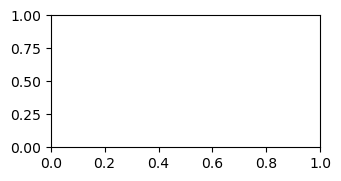

In [3]:
cities_1 = np.unique(station_coords.station)

fig=plt.figure(figsize=(16,12))
j=0
countries = cities_1

for country in countries:
    j=j+1
    ax = plt.subplot(6,4,j)
    all_pickles = glob.glob('../data/pickles_py/point/cities/onset/onset_day_'+country+'_1.pickle')

    with open(all_pickles[0], 'rb') as handle:
        pickles = pickle.load(handle)
    a = pd.DataFrame()
    for dat in pickles.keys():
        #print(dat)
        b = pd.DataFrame(pickles[str(dat)].set_index('year')['onset_date'])
        c = pd.DataFrame(pd.to_datetime(b['onset_date'].values).dayofyear)
        onset_dates = pd.to_datetime(b['onset_date'].values)
        dekads_val = pd.DataFrame(dekad.get_dekad_period(onset_dates))
        c_1 = pd.concat([pd.DataFrame(b.index), dekads_val], axis=1).set_index('year')
        c_1.columns = [dat]
        a = pd.concat([a,c_1],axis=1)
        
    
    levs = np.arange(0, 18, 1)
        
    #### Condition to let the rainfall season for Cape Town to run from January and the rest of the cities to start in July
    if country == 'Cape Town':
        #print('Yes')
        a_b = a.loc[1991:2020]
        a_b[a_b == 18] = np.nan
        a_b = a_b.T
    else:
        a_a = a.loc[1991:2020]
    
        a_a[a_a < 17] = a_a+36
        a_a[a_a == 18] = np.nan
        a_a = a_a-18

        a_a = a_a.T
        la,lb = np.meshgrid(np.arange(np.min(a_a.T.index), np.max(a_a.T.index)+1, 1), np.arange(1, len(a_a.T.keys())+1, 1))

    levs = np.arange(0, 20, 1)
    cmap_1 = plt.cm.get_cmap('YlOrBr',len(levs))
    colors = list(cmap_1(np.arange(len(levs))))
    colors[0] = "white"
    cmap = mpl.colors.ListedColormap(colors[:-1], "")
    cmap.set_over(colors[-1])
    
    if country == 'Cape Town':
        lc,ld = np.meshgrid(np.arange(np.min(a_b.T.index), np.max(a_b.T.index)+1, 1), 
                            np.arange(1, len(a_b.T.keys())+1, 1))

        pl = ax.pcolormesh(lc, ld, a_b, cmap=cmap, edgecolors='k', linewidths=.5,
                           norm = mpl.colors.BoundaryNorm(levs, ncolors=len(levs)-1, clip=False))
    else:
        pl = ax.pcolormesh(la, lb, a_a, cmap=cmap, edgecolors='k', linewidths=.5,
                       norm = mpl.colors.BoundaryNorm(levs, ncolors=len(levs)-1, clip=False))
    
    ax.set_facecolor('grey')
    ax.set_xticks(np.arange(1990, 2021, 5))
    plt.setp(ax.get_xticklabels(), rotation=90, ha="right",rotation_mode="anchor")
    if j in [2,3,4,6,7,8,10, 11,12,
             14,15,16, 18, 19]:
            ax.set_yticklabels('')
            ax.set_xticklabels('')
    if j in [1, 5, 9, 13, 17 ]:
            ax.set_xticklabels('')
            ax.set_yticklabels(a1.T.keys())
    if j in [20,22,23,24]:
            ax.set_yticklabels('')
            
    if j in [21]:
            ax.set_yticklabels(a_a.T.keys())        
    ax.set_yticks(np.arange(1, len(a_a.T.keys())+1, 1),)
    ax.set_title(country, size = 10, loc='right')
    #ax.set_yticklabels(a1.T.keys())
    
cax = fig.add_axes([0.3, 0.04, 0.5, 0.01])   
bar = fig.colorbar(pl, cax=cax, orientation='horizontal', extend="max")
bar.set_label('Onset dekad',size=12)
#plt.savefig('../Images/onset_dekads_cities.png', bbox_inches='tight',dpi=300)



In [ ]:
all_pickles

In [ ]:
cities_1 = np.unique(station_coords.station)

fig=plt.figure(figsize=(16,12))
j=0
countries = cities_1

for country in countries:
    j=j+1
    ax = plt.subplot(6,4,j)
    pickles = glob.glob('../data/pickles_py/point/cities/onset/cessation*'+country+'*pickle')

    with open(pickles[0], 'rb') as handle:
        pickles = pickle.load(handle)
    a = pd.DataFrame()
    for dat in pickles.keys():
        #print(dat)
        b = pd.DataFrame(pickles[str(dat)].set_index('year')['cessation_date'])
        c = pd.DataFrame(pd.to_datetime(b['cessation_date'].values).dayofyear)
        onset_dates = pd.to_datetime(b['cessation_date'].values)
        dekads_val = pd.DataFrame(dekad.get_dekad_period(onset_dates))
        c_1 = pd.concat([pd.DataFrame(b.index), dekads_val], 1).set_index('year')
        c_1.columns = [dat]
        a = pd.concat([a,c_1],1)
        
    a1 = a.loc[1991:2020]
    a1[a1 < 18] = a1+36
    a1 = a1.T
    
    la,lb = np.meshgrid(np.arange(np.min(a1.T.index), np.max(a1.T.index)+1, 1), np.arange(1, len(a1.T.keys())+1, 1))

    levs = np.arange(30, 50, 1)
    cmap_1 = plt.cm.get_cmap('YlOrBr_r',len(levs))
    colors = list(cmap_1(np.arange(len(levs))))
    colors[0] = "white"
    cmap = mpl.colors.ListedColormap(colors[:-1], "")
    cmap.set_over(colors[-1])
    pl = ax.pcolormesh(la, lb, a1, cmap=cmap, edgecolors='k', linewidths=.5,
        norm = mpl.colors.BoundaryNorm(levs, ncolors=len(levs)-1, clip=False))
    ax.set_xticks(np.arange(1990, 2021, 5))
    ax.set_facecolor('grey')
    plt.setp(ax.get_xticklabels(), rotation=90, ha="right",rotation_mode="anchor")
    if j in [2,3,4,6,7,8,10, 11,12,
             14,15,16, 18, 19]:
            ax.set_yticklabels('')
            ax.set_xticklabels('')
    if j in [1, 5, 9, 13, 17 ]:
            ax.set_xticklabels('')
            ax.set_yticklabels(a1.T.keys())
    if j in [20,22,23,24]:
            ax.set_yticklabels('')
            
    if j in [21]:
            ax.set_yticklabels(a1.T.keys())        
    ax.set_yticks(np.arange(1, len(a1.T.keys())+1, 1),)
    ax.set_title(country, size = 10, loc='right')
    #ax.set_yticklabels(a1.T.keys())
    
cax = fig.add_axes([0.3, 0.04, 0.5, 0.01])   
bar = fig.colorbar(pl, cax=cax, orientation='horizontal', extend="max")
bar.set_label('cessation dekad',size=12)



cities_1 = np.unique(station_coords.station)

countries = cities_1
pickles = glob.glob('data/pickles_py/point/cities/onset/cessation*pickle')
rows, cols = 6, 4
fig, ax = plt.subplots(rows, cols,
                       sharex='col', 
                       sharey='row', figsize=(16,12))
i=0
for row in range(rows):
    for col in range(cols):
        ax1 = ax[row, col]
        i=i+1
        country = countries[i-1]
        with open(pickles[i-1], 'rb') as handle:
            pickles_1 = pickle.load(handle)
        a = pd.DataFrame()
        for dat in pickles_1.keys():
            #print(dat)
            b = pd.DataFrame(pickles_1[str(dat)].set_index('year')['cessation_date'])
            c = pd.DataFrame(pd.to_datetime(b['cessation_date'].values).dayofyear)
            onset_dates = pd.to_datetime(b['cessation_date'].values)
            dekads_val = pd.DataFrame(dekad.get_dekad_period(onset_dates))
            c_1 = pd.concat([pd.DataFrame(b.index), dekads_val], 1).set_index('year')
            c_1.columns = [dat]
            a = pd.concat([a,c_1],1)

        a1 = a.loc[1991:2020]
        a1[a1 < 18] = a1+36
        a1 = a1.T

        la,lb = np.meshgrid(np.arange(np.min(a1.T.index), np.max(a1.T.index)+1, 1), np.arange(1, len(a1.T.keys())+1, 1))

        levs = np.arange(20, 36, 1)
        cmap_1 = plt.cm.get_cmap('YlOrBr',len(levs))
        colors = list(cmap_1(np.arange(len(levs))))
        colors[0] = "white"
        cmap = mpl.colors.ListedColormap(colors[:-1], "")
        cmap.set_over(colors[-1])
        pl = ax1.pcolormesh(la, lb, a1, cmap=cmap, edgecolors='k', linewidths=.5,
            norm = mpl.colors.BoundaryNorm(levs, ncolors=len(levs)-1, clip=False))
        ax1.set_xticks(np.arange(1990, 2021, 5))
        plt.setp(ax1.get_xticklabels(), rotation=90, ha="right",rotation_mode="anchor")

        ax1.set_yticks(np.arange(1, len(a1.T.keys())+1, 1),)
        ax1.set_title(country, loc='right')
        ax1.set_yticklabels(a1.T.keys())

    cax = fig.add_axes([0.3, 0.04, 0.5, 0.01])   
    bar = fig.colorbar(pl, cax=cax, orientation='horizontal', extend="max")
    bar.set_label('cessation dekad')
plt.tight_layout()    



In [ ]:
import matplotlib as mpl
import matplotlib.colors


pickles = glob.glob('../data/pickles_py/point/cities/onset/onset_day_Gabor*_1.pickle')

ifile = pickles[0]
file_split=ifile.split("/")
filename=file_split[-1]
filename_base=filename.split(".")[0]
filename_split=filename_base.split("_")
institute=filename_split[2]  
country=filename_split[-2]
#print(country)
with open(ifile, 'rb') as handle:
    pickles_1 = pickle.load(handle)
a = pd.DataFrame()
for dat in pickles_1.keys():
    #print(dat)
    b = pd.DataFrame(pickles_1[str(dat)].set_index('year')['onset_date'])
    c = pd.DataFrame(pd.to_datetime(b['onset_date'].values).dayofyear)
    onset_dates = pd.to_datetime(b['onset_date'].values)
    dekads_val = pd.DataFrame(dekad.get_dekad_period(onset_dates))
    c_1 = pd.concat([pd.DataFrame(b.index), dekads_val], axis=1).set_index('year')
    c_1.columns = [dat]
    a = pd.concat([a,c_1],axis=1)

#if country == 'Cape Town':
    print('Yes')
    a1 = a.loc[1991:2020]
    a1[a1 == 18] = np.nan
    #print(a)
    a1 = a1.T
    #levs = np.arange(0, 18, 1)
    
la,lb = np.meshgrid(np.arange(np.min(a1.T.index), np.max(a1.T.index)+1, 1), np.arange(1, len(a1.T.keys())+1, 1))

fig=plt.figure(figsize=(6,4))
ax = plt.subplot(1,1,1)

levs = np.arange(0, 18, 1)
cmap_1 = plt.cm.get_cmap('YlOrBr',len(levs))
colors = list(cmap_1(np.arange(len(levs))))
colors[0] = "white"
cmap = matplotlib.colors.ListedColormap(colors[:-1], "")
cmap.set_over(colors[-1])
pl = ax.pcolormesh(la, lb, a1, cmap=cmap, edgecolors='k', linewidths=.5,
    norm = mpl.colors.BoundaryNorm(levs, ncolors=len(levs)-1, clip=False))
ax.set_facecolor('grey')
ax.set_yticks(np.arange(1, len(a1.T.keys())+1, 1))
ax.set_yticklabels(a1.T.keys())
ax.set_xticks(np.arange(1990, 2021, 2))
ax.set_title(country, loc='right')
plt.setp(ax.get_xticklabels(), rotation=90, ha="right",rotation_mode="anchor")
plt.colorbar(pl, extend="max")
plt.show()

#plt.savefig('Images/onset_dekad_'+country+'.png', bbox_inches='tight',dpi=300)


In [ ]:
ref_file

In [ ]:
root_path = '/media/tiro/nkemelang/atkins/activities/activity_2.1b/data/'

file_path_obs = root_path+'*/*/*/*/*/*/sadc/'

mask_file = glob.glob(file_path_obs+'era5_land_sea_mask_SA_no_lakes.nc')
mask = xr.open_dataset(mask_file[0]).pr
files_obs = glob.glob(file_path_obs+'*era5.nc')

ref_file = files_obs[0]
var = 'pr'
file_xr = xr.open_dataset(ref_file)
#units = file_xr[var].attrs['units']
lons = file_xr.variables['longitude'][:]
lats = file_xr.variables['latitude'][:]
clim_var_ref = file_xr[var]
#clim_var_ref =clim_var_ref.resample(time='1Y').sum('time')

clim_var_ref = clim_var_ref*mask

output = []

years = clim_var_ref.time.resample(time = '1Y').min().to_dataframe().index

for year in years.strftime('%Y'):
    print(year)
    yr = str(str(year)+'-07-01')
    yr_2 = str(str(np.intc(year)+1)+'-06-30')

    for l in np.arange(len(lats)):
        for m in np.arange(len(lons)):
            lon, lat = [lons[m], lats[l]]
            ts = clim_var_ref.sel(latitude = lat).sel(longitude = lon)
            ts_yr = ts.sel(time = slice(yr, yr_2))
            #try:
            try:
                m2 = ts_yr.shift(time = 1).rolling(time = 3).sum().shift(time = -4) >= 20
                            #print(trend_mk)
                m3 = ts_yr.shift(time = 3).rolling(time = 10).sum().shift(time = -9) - ts_yr.rolling(time = 3).sum().shift(time = -2) > 0

                day = ts_yr.loc[m2 & m3].time[0].values

                #b = pd.DataFrame(pickles[str(dat)].set_index('year')['onset_date'])
                day_1 = pd.to_datetime(day).dayofyear

                dekads_val = dekad.get_dekad_period([pd.to_datetime(day)])
                onset_dekad = dekads_val[0]
                if onset_dekad < 18:
                    onset_dekad = onset_dekad + 18
            #print(day, dekads_val)

            except:
                onset_dekad = np.nan

            output.append(onset_dekad)


output = np.copy(output).reshape(len(years), len(lats), len(lons))

onset_dates = xr.DataArray(output, dims = ('time', 'latitude', 'longitude' ), coords= {'time':years, 'longitude':lons, 'latitude':lats})    




In [ ]:
onset_dates.to_netcdf('../data/onset_dates/all_onset_dekads.nc')

In [ ]:
lon = 26
lat = -24.75

In [ ]:
onset_dates_2
#onset_dates_2.sel(latitude = lat).sel(longitude = lon)

In [ ]:
test = xr.open_dataset('../data/onset_dates/onset_dekads_1995_all.nc')

test.onset_dekads.min('time').plot()

In [ ]:
onset_dates_1 = xr.open_dataset('../data/onset_dates/all_onset_dekads.nc')
(onset_dates_1.__xarray_dataarray_variable__.sel(time = slice('1991', '2020')).sel(latitude = lat).sel(longitude = lon)-18).plot()
#onset_dates_2.sel(latitude = lat).sel(longitude = lon).plot()


In [ ]:
(a.ARC2.loc[1991:2020]-18).values

In [ ]:
onset_dates_2 = xr.open_dataset('../data/onset_dates/all_onset_dekads_3.nc')
(onset_dates_2.onset_dekads.sel(latitude = lat).sel(longitude = lon).values-18)[9:38]

In [ ]:
a.ARC2.loc[1992:2021]

In [ ]:
plt.plot((onset_dates_1.__xarray_dataarray_variable__.sel(latitude = lat).sel(longitude = lon)).values[9:38])
plt.plot((onset_dates_2.onset_dekads.sel(latitude = lat).sel(longitude = lon).values)[9:38])
plt.plot((a.ARC2.loc[1992:2021]).values)